Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: Order, dtype: int64


<Axes: >

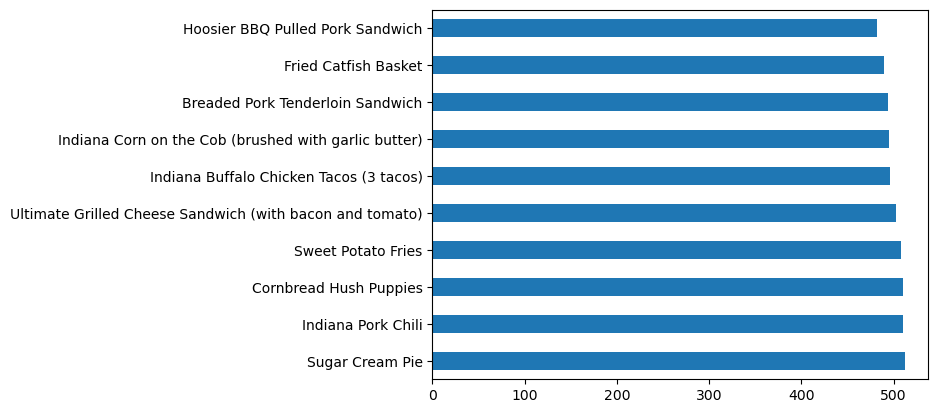

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
import pickle

df = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
orders = df.Order
universities = df.University
majors = df.Major
years = df.Year
times = df.Time
orders_dict = {}
university_dict = {}
major_dict = {}
year_dict = {}
time_dict = {}

for i in range(len(orders)):
    orders_dict[orders[i]] = orders_dict.get(orders[i], 0) + 1

for i in range(len(universities)):
    university_dict[universities[i]] = university_dict.get(universities[i], 0) + 1

for i in range(len(majors)):
    major_dict[majors[i]] = major_dict.get(majors[i], 0) + 1

for i in range(len(years)):
    year_dict[years[i]] = year_dict.get(years[i], 0) + 1

for i in range(len(times)):
    time_dict[times[i]] = time_dict.get(times[i], 0) + 1

print(orders.value_counts())
orders.value_counts().plot(kind="barh")

Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: University, dtype: int64


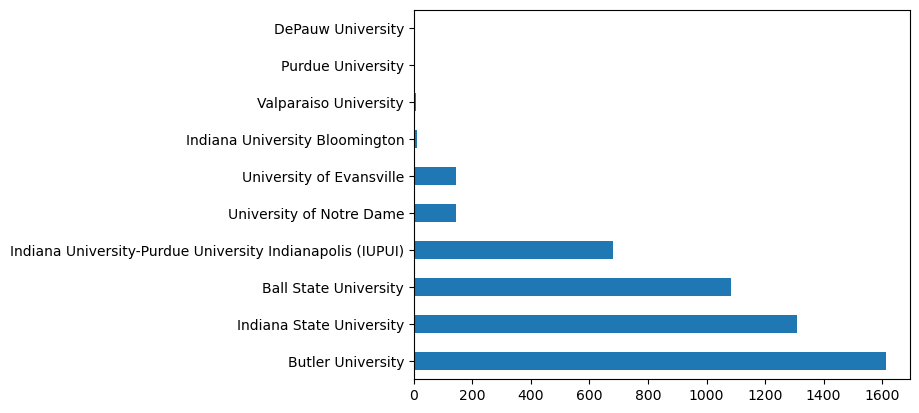

In [244]:
print(universities.value_counts())
ax = universities.value_counts().plot(kind="barh")

Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64


<Axes: >

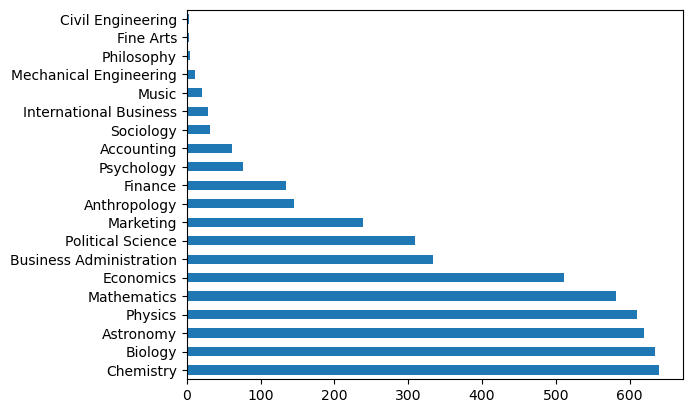

In [245]:
print(majors.value_counts())
majors.value_counts().plot(kind="barh")

Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64


<Axes: >

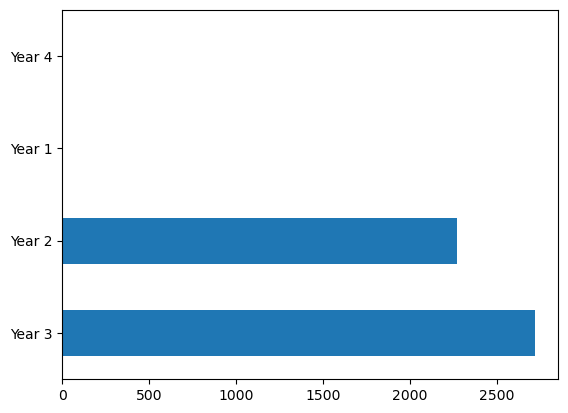

In [246]:
print(years.value_counts())
years.value_counts().plot(kind="barh")

13    1316
12    1314
14     883
11     857
15     282
10     247
16      49
9       40
8        8
17       4
Name: Time, dtype: int64


<Axes: >

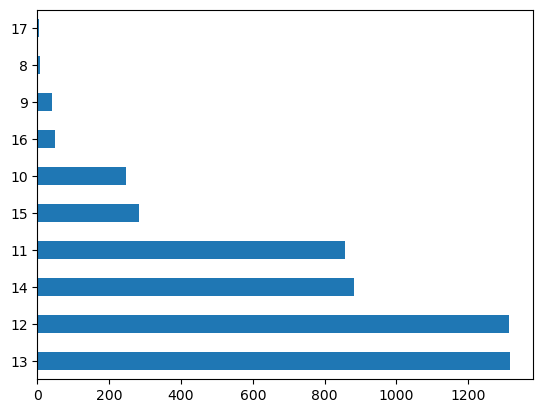

In [247]:
print(times.value_counts())
times.value_counts().plot(kind="barh")

From the data analysis above, the orders seem to be uniformly distributed across all 10 different possible orders. However, the amount of data avaliable in the University, Major, Year, and Time columns is not uniform. In these categories, there appears to be a lot of data for certain entries while very little for others. For example, there is a lot of data for Butler Unviersity and IU students and only 1 data point for Purdue University Students. From this data, FoodX could modify its business strategy to cater to students from universities that order from them the most since that is where most of its customers will be coming from. Almost all of the students ordering from FoodX are 2nd or 3rd year students, with 1st and 4th year students present in negligible amounts. Additionally, since most students seem to order during lunchtime (11-14) with very few students at other times of the day, FoodX could also consider adjusting its hours to operate during this time period and be closed otherwise to maximize the amount of profit gained.

1. Ethical Implications: While this dataset can be very useful to increase profits and help predict what a student might order based on some information on them, it would not be ethical to use this data unless granted permission by the students it came from. Students should be clearly made aware that the data they input on the FoodX app might be used for analysis and guide business decisions, and there should also be an option to opt out at any time. Additonally, measures should also be taken to secure the data from hacking attempts and also eliminate any personal identifiers in it (e.g names, birthdays, etc.) This ensures that any data collected is legal and ethical to use. 

2. Business outcome implications: To ensure that data analysis and machine learning results are useful, FoodX would need to find a way to get data that is meaningful, since useless/garbage data will result in useless results. Furthermore, FoodX would also need to check that it is compliant with any laws regarding data collection and storage, since any controversies could damage the public image of the company.

3. Technical Implications: To store all the data collected, an efficient database system will have to implemented and maintained by experts for quick and easy access to it. Security measures are also necessary to guard against bad actors trying to steal information of customers stored in the databases. Furthermore, the data will also have to be constantly analyzed and machine learning models retrained to take into account any new trends or insights.

To be able to train a machine learning model on this data, all categorical features, namely the year, major, and university columns of the dataset will have to be transformed to numerical values. This can be accomplished using the OrdinalEncoder() built into SKLearn. The same will also have to be done to the target variable, the order, since it is also a categorical variable. This was completed using the LabelEncoder() in SKLearn. 

To select a classifier, I decided to use SKLearn's Gradient Boosting Classifier with a learning rate of 0.5, as this model configuration resulted in the least error when trained and tested on the given dataset

In [248]:
# Preprocess the data by splitting the dataset into testing and training sets.
# Then, extract the categorical values and transform them into numerical values
# using encoders built into scikit-learn.

def process_data():
    y = df.Order
    training_data = df.drop(['Order'], axis=1)
    X_train, X_valid, y_train, y_valid = train_test_split(training_data, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)
    temp = (X_train.dtypes == 'object')
    categorical_cols = list(temp[temp].index)
    encoder = OrdinalEncoder()
    label_encoder = LabelEncoder()
    encoded_X_train = X_train.copy()
    encoded_X_valid = X_valid.copy()
    encoded_y_train = label_encoder.fit_transform(y_train)
    encoded_y_valid = label_encoder.transform(y_valid)
    encoded_X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
    encoded_X_valid[categorical_cols] = encoder.transform(X_valid[categorical_cols])
    return encoded_X_train, encoded_X_valid, encoded_y_train, encoded_y_valid
    

In [249]:
# Train the model with the GradientBoostingClassifier with the training data. Then, test
# it with the testing data and report the results of the prediction with scikit-learn's 
# mean_absolute_error() function and model.score()

def train_and_test(X_train, X_valid, y_train, y_valid):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    saved_model = pickle.dumps(model)
    return [mean_absolute_error(y_valid, preds), model.score(X_valid, y_valid), saved_model]

In [250]:
X_train, X_valid, y_train, y_valid = process_data()
results = train_and_test(X_train, X_valid, y_train, y_valid)
print(f'Mean Squared Error: {results[0]}; R^2 value: {results[1]}')

Mean Squared Error: 1.436; R^2 value: 0.652
